# Assignment 1

First we need to import a few modules, execute the cell below:

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [2]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    cos = numpy.cos(x)
    return cos

You can use the following cell to check that your code works for scalar arguments:

In [3]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [4]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [5]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    derivativef = -1*numpy.sin(x)
    return derivativef

In [6]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [7]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [8]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    backdiff = (f(x)-f(x-dx))/(dx)
    return backdiff

In [9]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


Text(0,0.5,'Backwards difference - analytical')

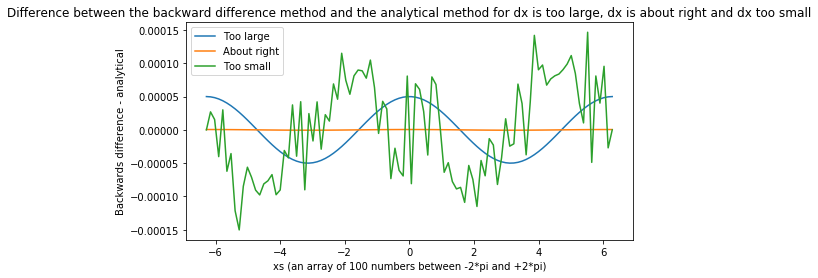

In [25]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)

df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-12)

df_dx_analytical = df_analytic(xs)

plt.figure(figsize=(8, 4))

plt.title("Difference between the backward difference method and the analytical method for dx is too large, dx is about right and dx too small")

plt.plot(xs, df_dx_1 - df_dx_analytical, label = 'Too large')
plt.plot(xs, df_dx_2 - df_dx_analytical, label = 'About right')
plt.plot(xs, df_dx_3 - df_dx_analytical, label = 'Too small')

plt.legend(loc = 'upper left')

plt.xlabel("xs (an array of 100 numbers between -2*pi and +2*pi)")
plt.ylabel("Backwards difference - analytical")

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When dx is too large, we lose accuracy as the backwards difference method assumes that dx is tending towards 0. Therefore, the larger dx is, the farther away from this approximation we get, so the less accurate our result shall be.

When dx is too small, we encounter issues with the storage of the value calculated. Essentially, the computer will 'chop off' the digits of a small number it needs to store past the 6th digit, causing some information (and therefore precision) to be lost here. If we now perform a function which causes the numbre of digits to reduce again, eg from 6 to 4, every  digit after the final one will become some garbage data (in the example here it would be the 5th and 6th digits). This garbage data is generated by the computer, so if this process is repeated, the exact same garbage data will be generated. The smaller dx is, the larger the proportion of dx these garbage data take up, leading to large errors to occur. This is why the difference for the dx too small appears random in fluctuation.